<a href="https://colab.research.google.com/github/dijkstra001/fraud-analytics/blob/main/dqr_fraud_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FRAUDS ANALYTICS**

#### **OBJETIVO:**
Esse projeto tem como objetivo analisar um conjunto de dados reais, disponíveis em: e detectar as causas de fraudes no ramo imobiliário.

Análise de fraudes é um tema complexo, pois várias técnicas são estudadas e desenvolvidas por aqueles que praticam esses atos. Por isso, esse projeto tem finalidade de pesquisa e estudo, não sendo ideal para uma prática comercial. 

**PARTE 1: DATA QUALITY REPORT**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x : '%.2f' % x)
%matplotlib inline

**RESUMO DOS DADOS:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/fraud-analytics/datasets/dataset.csv")
dataset.head(10)

Mounted at /content/drive


,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,nan,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004.00,X3,0,0,3775500.00,8613000.00,3775500.00,8613000.00,nan,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,nan,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004.00,X3,0,0,11111400.00,80690400.00,11111400.00,80690400.00,nan,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004.00,X1,709,564,32321790.00,40179510.00,32321790.00,40179510.00,nan,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004.00,X1,85,551,13644000.00,15750000.00,13644000.00,15750000.00,nan,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004.00,X1,89,57,106348680.00,107758350.00,106348680.00,107758350.00,nan,FINAL,2010/11,AC-TR
5,6,1000030002,1,3,2,NaN,PARKS AND RECREATION,Q1,4,496,76,NaN,nan,10600000.00,4770000.00,4770000.00,4770000.00,4770000.00,2231.00,PETER MINUIT PLAZA,10004.00,X1,0,0,4268700.00,4268700.00,4268700.00,4268700.00,nan,FINAL,2010/11,AC-TR
6,7,1000030003,1,3,3,NaN,PARKS AND RECREATION,Q1,4,180,370,NaN,1.00,8489997.00,3820499.00,3820499.00,3820499.00,3820499.00,2231.00,PETER MINUIT PLAZA,10004.00,X1,16,19,3546900.00,3546900.00,3546900.00,3546900.00,nan,FINAL,2010/11,AC-TR
7,8,1000030010,1,3,10,NaN,DEPT RE-CITY OF NY,Z9,4,362,177,NaN,3.00,28100000.00,11070000.00,12645000.00,11070000.00,12645000.00,4600.00,1 SOUTH STREET,10004.00,X3,37,227,9882000.00,11304000.00,9882000.00,11304000.00,nan,FINAL,2010/11,AC-TR
8,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,NaN,50.00,3944762.00,636093.00,1775143.00,0.00,0.00,nan,1 WATER STREET,10004.00,NaN,0,0,636093.00,2049290.00,nan,nan,nan,FINAL,2010/11,AC-TR
9,10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,0,0,NaN,50.00,5700930.00,919276.00,2565419.00,0.00,0.00,nan,1 WATER STREET,10004.00,NaN,0,0,919276.00,2961617.00,nan,nan,nan,FINAL,2010/11,AC-TR


In [3]:
print(f'Nº de linhas: {dataset.shape[0]}')
print(f'Nº de colunas: {dataset.shape[1]}')
print(f'Variáveis: {dataset.columns.to_list()}')
print(f'\nValores únicos:\n{dataset.nunique()}')

Nº de linhas: 1070994
Nº de colunas: 32
Variáveis: ['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

Valores únicos:
RECORD      1070994
BBLE        1070994
B                 5
BLOCK         13984
LOT            6366
EASEMENT         12
OWNER        863346
BLDGCL          200
TAXCLASS         11
LTFRONT        1297
LTDEPTH        1370
EXT               3
STORIES         111
FULLVAL      109324
AVLAND        70921
AVTOT        112914
EXLAND        33419
EXTOT         64255
EXCD1           129
STADDR       839280
ZIP             196
EXMPTCL          14
BLDFRONT        612
BLDDEPTH        621
AVLAND2       58591
AVTOT2       111360
EXLAND2       22195
EXTOT2        48348
EXCD2            60
PERIOD            1
YEAR              1

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 32 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   RECORD    1070994 non-null  int64  
 1   BBLE      1070994 non-null  object 
 2   B         1070994 non-null  int64  
 3   BLOCK     1070994 non-null  int64  
 4   LOT       1070994 non-null  int64  
 5   EASEMENT  4636 non-null     object 
 6   OWNER     1039249 non-null  object 
 7   BLDGCL    1070994 non-null  object 
 8   TAXCLASS  1070994 non-null  object 
 9   LTFRONT   1070994 non-null  int64  
 10  LTDEPTH   1070994 non-null  int64  
 11  EXT       354305 non-null   object 
 12  STORIES   1014730 non-null  float64
 13  FULLVAL   1070994 non-null  float64
 14  AVLAND    1070994 non-null  float64
 15  AVTOT     1070994 non-null  float64
 16  EXLAND    1070994 non-null  float64
 17  EXTOT     1070994 non-null  float64
 18  EXCD1     638488 non-null   float64
 19  STADDR    1070318 non

**SEPARANDO AS VARIÁVEIS NUMÉRICAS E CATEGÓRICAS:**

In [5]:
numerics_vars = ['RECORD', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'ZIP', 'BLDFRONT', 'BLDDEPTH', 
                 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2']

categoric_vars = ['B', 'BBLE', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT',  'STORIES', 
                  'STADDR',  'EXMPTCL', 'PERIOD', 'YEAR', 'VALTYPE']

**SEPARANDO O DATASET DE ACORDO COM OS TIPOS DE VARIÁVEIS:**

In [6]:
dataset_num = dataset[numerics_vars]
dataset_cat = dataset[categoric_vars]

**RESUMO ESTATÍSTICO DAS VARIÁVEIS NUMÉRICAS:**

In [7]:
summ_num = pd.DataFrame(index = dataset_num.columns)
summ_num['Types'] = dataset_num.dtypes.values
summ_num['Non-null-registers'] = dataset_num.count().values
summ_num['Non-zero-registers'] = dataset_num.astype(bool).sum(axis = 0)
summ_num['Populated'] = round(summ_num['Non-null-registers'] / dataset_num.shape[0] * 100, 2)
summ_num['Unique-values'] = dataset_num.nunique().values
summ_num['Mean'] = round(dataset_num.mean(), 2)
summ_num['Std'] = round(dataset_num.std(), 2)
summ_num['Min'] = round(dataset_num.min(), 2)
summ_num['Max'] = round(dataset_num.max(), 2)
summ_num

,Types,Non-null-registers,Non-zero-registers,Populated,Unique-values,Mean,Std,Min,Max
RECORD,int64,1070994,1070994,100.00,1070994,535497.50,309169.48,1.00,1070994.00
FULLVAL,float64,1070994,1057987,100.00,109324,874264.51,11582430.99,0.00,6150000000.00
AVLAND,float64,1070994,1057985,100.00,70921,85067.92,4057260.06,0.00,2668500000.00
AVTOT,float64,1070994,1057987,100.00,112914,227238.17,6877529.31,0.00,4668308947.00
EXLAND,float64,1070994,579295,100.00,33419,36423.89,3981575.79,0.00,2668500000.00
EXTOT,float64,1070994,638422,100.00,64255,91186.98,6508402.82,0.00,4668308947.00
EXCD1,float64,638488,1070994,59.62,129,1602.01,1384.23,1010.00,7170.00
ZIP,float64,1041104,1070994,97.21,196,10923.96,528.42,10001.00,33803.00
BLDFRONT,int64,1070994,842179,100.00,612,23.04,35.58,0.00,7575.00
BLDDEPTH,int64,1070994,842141,100.00,621,39.92,42.71,0.00,9393.00


**RESUMO ESTATÍSCICO DAS VARIÁVEIS CATEGÓRICAS:**

In [8]:
summ_cat = pd.DataFrame(index = dataset_cat.columns)
summ_cat['Types'] = dataset_cat.dtypes.values
summ_cat['Non-null-registers'] = dataset_cat.count().values
summ_cat['Populated'] = round(summ_cat['Non-null-registers'] / dataset_cat.shape[0] * 100, 2)
summ_cat['Unique-values'] = dataset_cat.nunique().values

values = []
for x in categoric_vars:
  values.append(dataset_cat[x].value_counts().idxmax())
summ_cat['Commom-values'] = values
summ_cat

,Types,Non-null-registers,Populated,Unique-values,Commom-values
B,int64,1070994,100.00,5,4
BBLE,object,1070994,100.00,1070994,4055860023
BLOCK,int64,1070994,100.00,13984,3944
LOT,int64,1070994,100.00,6366,1
EASEMENT,object,4636,0.43,12,E
OWNER,object,1039249,97.04,863346,PARKCHESTER PRESERVAT
BLDGCL,object,1070994,100.00,200,R4
TAXCLASS,object,1070994,100.00,11,1
LTFRONT,int64,1070994,100.00,1297,0
LTDEPTH,int64,1070994,100.00,1370,100


**IDENTIFICAÇÃO, EXPLORAÇÃO E VISUALIZAÇÃO DE VARIÁVEIS:**

In [9]:
all_vars = dataset.columns
all_vars

Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')

In [10]:
dataset.head(5)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,nan,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004.00,X3,0,0,3775500.00,8613000.00,3775500.00,8613000.00,nan,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,nan,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004.00,X3,0,0,11111400.00,80690400.00,11111400.00,80690400.00,nan,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004.00,X1,709,564,32321790.00,40179510.00,32321790.00,40179510.00,nan,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004.00,X1,85,551,13644000.00,15750000.00,13644000.00,15750000.00,nan,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004.00,X1,89,57,106348680.00,107758350.00,106348680.00,107758350.00,nan,FINAL,2010/11,AC-TR


**Variável 1:**

**Nome:** BBLE

**Descrição:** Concatenação de cód. Borough, cód. de bloco, cód. LOT. É um número exclusivo para cada registro.

**Variável 2:**

**Nome:** B

**Descrição:** Cód. Borough

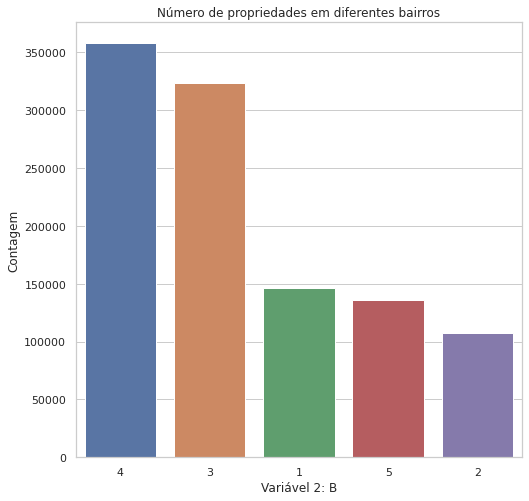

In [11]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (8, 8))
fig = sns.countplot(x = 'B', data = dataset, order = dataset['B'].value_counts().index)
plt.title('Número de propriedades em diferentes bairros')
plt.xlabel('Variável 2: B')
plt.ylabel('Contagem')
plt.show(fig)

**Variável 3:**

**Nome:** BLOCK

**Descrição:** Número de até 5 dígitos que representam códigos de bloco em diferentes bairros.

In [12]:
block = dataset_cat['BLOCK'].value_counts().rename_axis('Unique-values-BLOCK').reset_index(name = 'Counts')
block[:15]

,Unique-values-BLOCK,Counts
0,3944,3888
1,16,3786
2,3943,3424
3,3938,2794
4,1171,2535
5,3937,2275
6,1833,1774
7,2450,1651
8,1047,1480
9,7279,1302


**Variável 4:**

**Nome:** STORIES

**Descrição:** Número de andares do edifício.

In [13]:
dataset['STORIES'].describe(percentiles = [0.5, 0.75, 0.995])

count   1014730.00
mean          5.01
std           8.37
min           1.00
50%           2.00
75%           3.00
99.5%        50.00
max         119.00
Name: STORIES, dtype: float64

In [14]:
temp = dataset[dataset['STORIES'] <= 50]

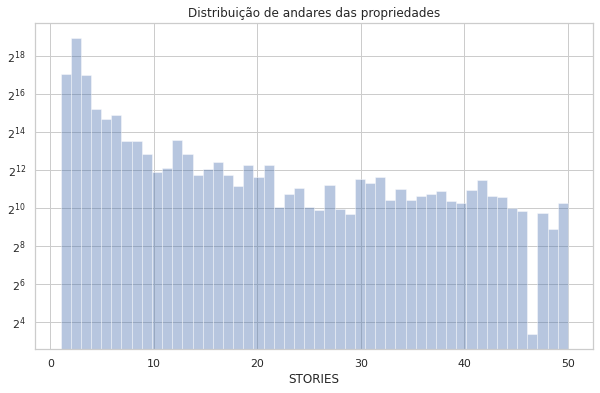

In [15]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (10, 6))
fig = sns.distplot(temp['STORIES'], kde = False, bins = 50)
fig.set_yscale('log', basey = 2)
fig.set_title('Distribuição de andares das propriedades')
plt.show(fig)